ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

/tmp/ipython-input-1781599658.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month':pd.date_range(start='2018-01',periods=24,freq='M'),


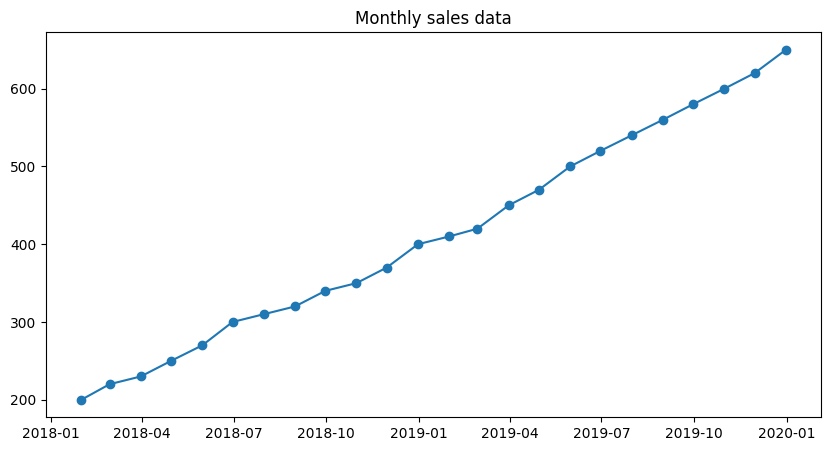

In [2]:
#Load dataset
data = pd.DataFrame({
    'Month':pd.date_range(start='2018-01',periods=24,freq='M'),
    'Sales':[200,220,230,250,270,300,310,320,340,350,370,400,
             410,420,450,470,500,520,540,560,580,600,620,650]
})
data.set_index('Month',inplace=True)
#plot data
plt.figure(figsize=(10,5))
plt.plot(data['Sales'],marker='o')
plt.title('Monthly sales data')
plt.show()

In [3]:
#Step3:Check stationarity(ADF Test)
def check_stationarity(series):
  result = adfuller(series)
  print('ADF Statistic:',result[0])
  print('p-value:',result[1])
  if result[1] <= 0.05:
    print("Stationary")
  else:
    print("Not Stationary")
check_stationarity(data['Sales'])

ADF Statistic: 1.3551050643521871
p-value: 0.9969003347519994
Not Stationary


ADF Statistic: -3.8658943604089964
p-value: 0.0023006870324156995
Stationary


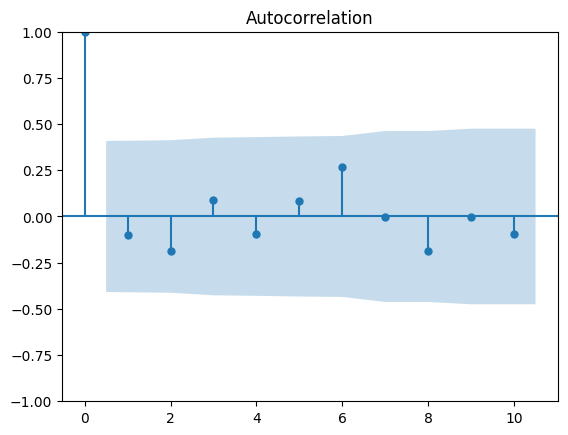

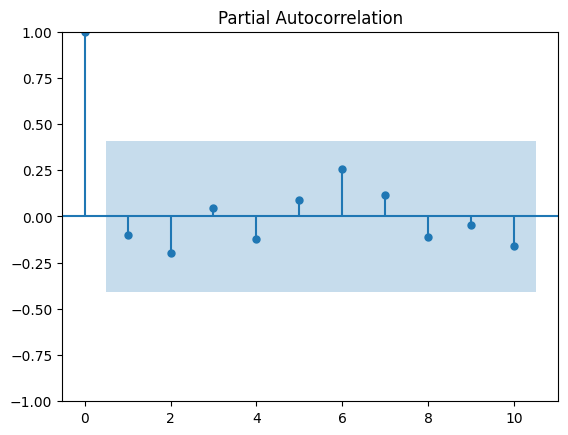

In [4]:
#Step4: Differencing to stationarity
data_diff = data['Sales'].diff().dropna()
check_stationarity(data_diff)
plot_acf(data_diff,lags=10)
plot_pacf(data_diff,lags=10)
plt.show()

In [5]:
#Step5:Fit ARIMA model
model = ARIMA(data['Sales'],order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -80.102
Date:                Sun, 21 Sep 2025   AIC                            166.203
Time:                        18:08:50   BIC                            169.610
Sample:                    01-31-2018   HQIC                           167.060
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.005    203.702      0.000       0.990       1.009
ma.L1         -0.9137      0.355     -2.571      0.010      -1.610      -0.217
sigma2        52.6164     23.772      2.213      0.0

/tmp/ipython-input-1192947599.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=data.index[-1],periods=12,freq='M')


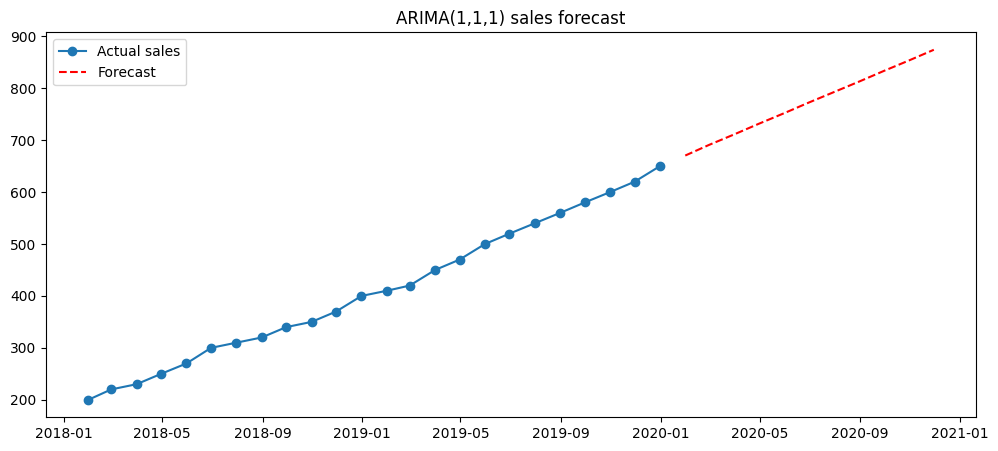

In [6]:
#Step6:Forecast future sales
forecast = model_fit.forecast(steps=12)
future_index = pd.date_range(start=data.index[-1],periods=12,freq='M')
forecast_df = pd.DataFrame({'Forecast':forecast},index=future_index)

plt.figure(figsize=(12,5))
plt.plot(data['Sales'],marker='o',label='Actual sales')
plt.plot(forecast_df['Forecast'],label='Forecast',color='red',linestyle='--')
plt.legend()
plt.title('ARIMA(1,1,1) sales forecast')
plt.show()


Airline passengers data

In [7]:
#Step1:Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url,header=0,index_col='Month',parse_dates=['Month'])
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

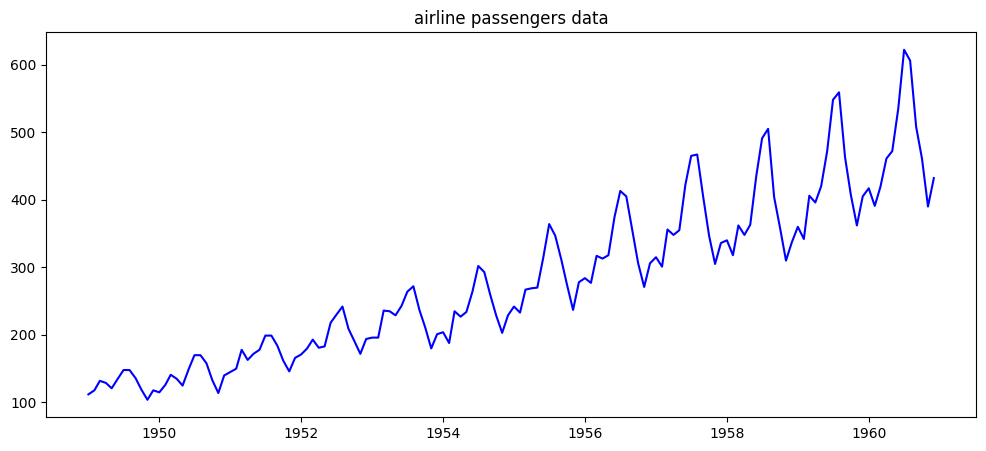

In [8]:
#Step2:Plot series
plt.figure(figsize=(12,5))
plt.plot(df['Passengers'],color='blue')
plt.title('airline passengers data')
plt.show()

In [9]:
#Step3:Fit ARIMA model
model = ARIMA(df['Passengers'],order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Sun, 21 Sep 2025   AIC                           1353.347
Time:                        18:09:03   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.814      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


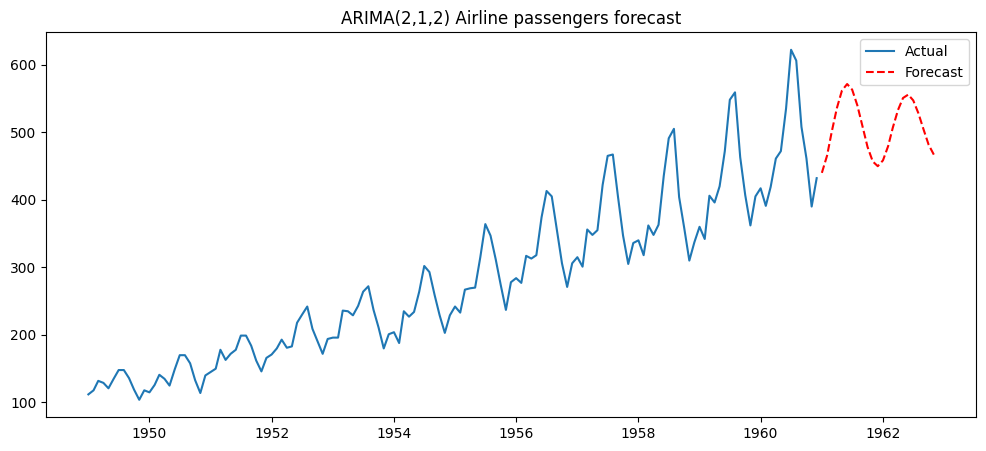

In [10]:
#Step4:Forecast
forecast = model_fit.forecast(steps=24)
future_index = pd.date_range(start=df.index[-1],periods=24,freq='MS')
forecast_df = pd.DataFrame({'Forecast':forecast},index=future_index)

plt.figure(figsize=(12,5))
plt.plot(df['Passengers'],label='Actual')
plt.plot(forecast_df['Forecast'],label='Forecast',color='red',linestyle='--')
plt.title('ARIMA(2,1,2) Airline passengers forecast')
plt.legend()
plt.show()

ARMA(2,0)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [12]:
#Step1:Load series
data = [100,104,107,111,115,119,120,124,127,130]
series = pd.Series(data)

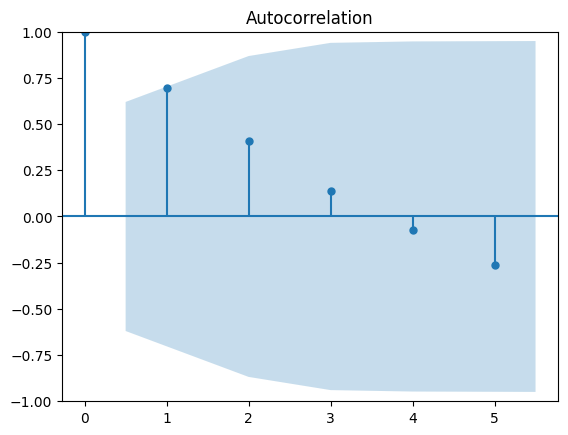

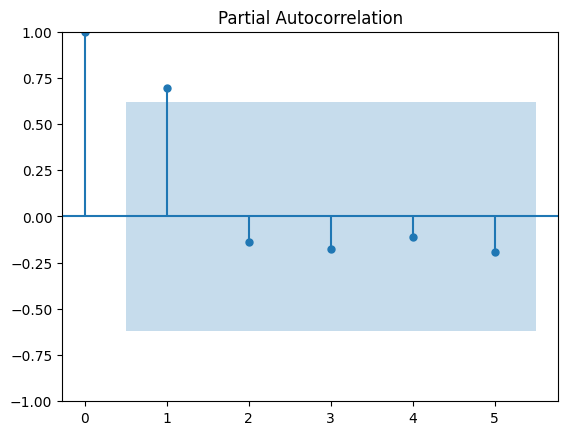

In [13]:
#Step2:ACF and PACF plots
plot_acf(series,lags=5)
plt.show()
plot_pacf(series,lags=5)
plt.show()

In [14]:
model = ARIMA(series,order=(2,0,0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -21.801
Date:                Sun, 21 Sep 2025   AIC                             51.601
Time:                        18:09:17   BIC                             52.811
Sample:                             0   HQIC                            50.273
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.8141     33.040      3.445      0.001      49.058     178.570
ar.L1          1.8378      0.457      4.023      0.000       0.942       2.733
ar.L2         -0.8723      0.413     -2.112      0.0

In [15]:
#Step4: Forecast next 3 values
forecast = result.forecast(steps=3)
print(forecast)

10    132.057897
11    133.222899
12    133.568770
Name: predicted_mean, dtype: float64


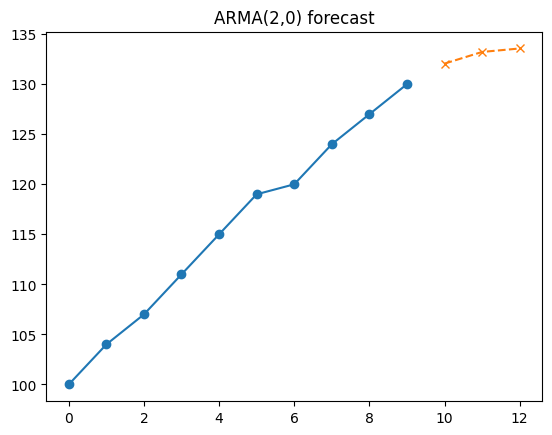

In [16]:
#Step5:Plot
plt.plot(series,label='Actual',marker='o')
plt.plot(range(len(series),len(series)+3),forecast,label='Forecast',marker='x',linestyle='--')
plt.title('ARMA(2,0) forecast')
plt.show()

ARIMA

In [17]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.1 MB/s eta 0:00:00


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
#from pmdarima import auto_arima

In [19]:
np.random.seed(42)

In [20]:
months = pd.date_range(start='2018-01-01',periods=60,freq='M')
sales = 200 + np.arange(60)*2 + np.random.normal(0,10,60)
data = pd.DataFrame({'Month':months,'Sales':sales})
data.set_index('Month',inplace=True)
print(data.head())

                 Sales
Month                 
2018-01-31  204.967142
2018-02-28  200.617357
2018-03-31  210.476885
2018-04-30  221.230299
2018-05-31  205.658466


/tmp/ipython-input-94441151.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2018-01-01',periods=60,freq='M')


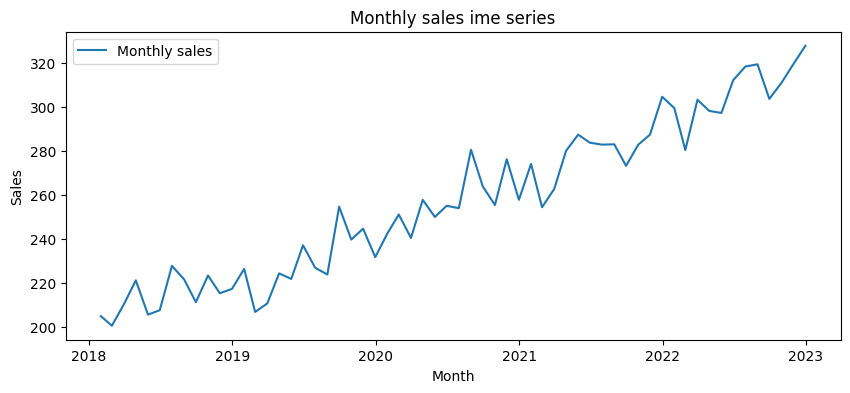

In [21]:
plt.figure(figsize=(10,4))
plt.plot(data['Sales'],label='Monthly sales')
plt.title('Monthly sales ime series')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [22]:
#check stationarity
result = adfuller(data['Sales'])
print("AdF statistic:",result[0])
print("p-value:",result[1])
if result[1] <= 0.05:
  print("Stationary")
else:
  print("Data is not Stationary")
#

AdF statistic: 1.2914496798697157
p-value: 0.9965606304178265
Data is not Stationary


In [23]:
model = ARIMA(data['Sales'],order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.403
Date:                Sun, 21 Sep 2025   AIC                            456.805
Time:                        18:09:53   BIC                            463.038
Sample:                    01-31-2018   HQIC                           459.238
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.293     -0.264      0.792      -0.650       0.496
ma.L1         -0.4760      0.260     -1.828      0.068      -0.986       0.034
sigma2       121.1655     24.103      5.027      0.0

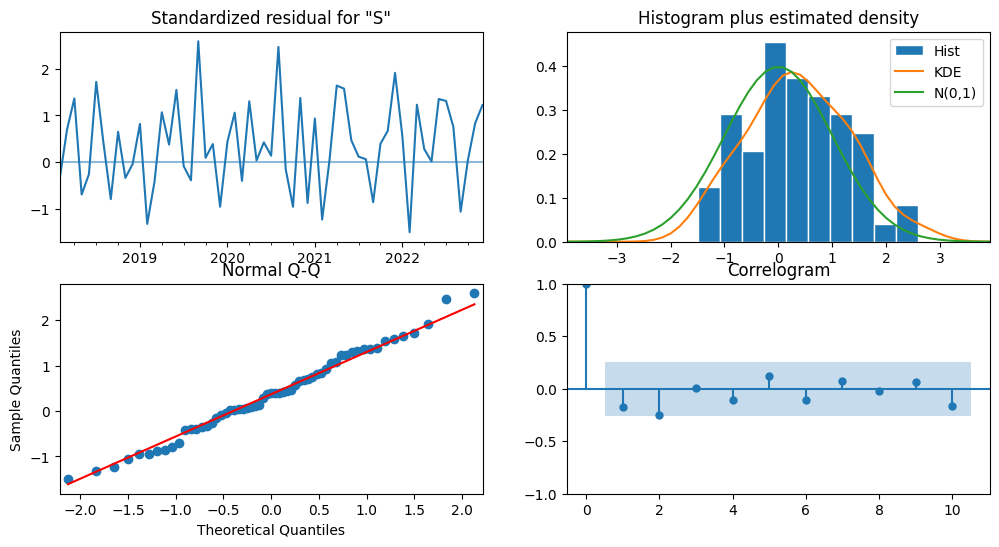

In [24]:
model_fit.plot_diagnostics(figsize=(12,6))
plt.show()

In [25]:
#Forecasting future values
forecast = model_fit.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

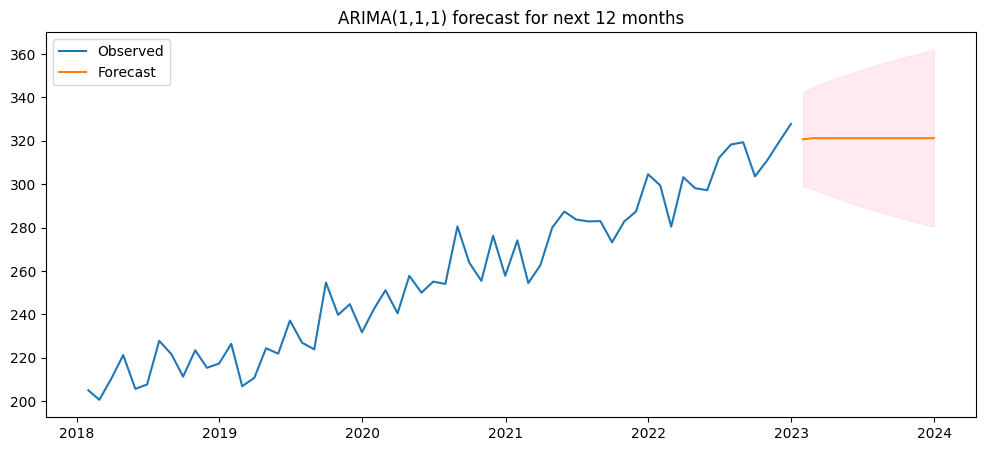

In [26]:
plt.figure(figsize=(12,5))
plt.plot(data['Sales'],label='Observed')
plt.plot(forecast_df['mean'],label='Forecast')
plt.fill_between(forecast_df.index,forecast_df['mean_ci_lower'],forecast_df['mean_ci_upper'],color='pink',alpha=0.3)
plt.title('ARIMA(1,1,1) forecast for next 12 months')
plt.legend()
plt.show()